## Ensemble: Bagging x Boosting x Stacking

Ensemble nada mais é do que a sabedoria da maioria. Aqui combinamos vários modelos mais simples em um único modelo robusto a fim de reduzir o viés, variância e/ou aumentar a acurácia.
<br>


## Tipos de Ensemble:
- __1. Bagging (short for bootstrap aggregation)__: Treina paralelamente N modelos mais fracos (geralmente do mesmo tipo - homogênio) com N subsets distintos criados com amostragem randômica e reposição. Cada modelo é avaliado na fase de teste com o label definido pela moda (classificação) ou pela média dos valores (regressão). Os métodos de Bagging reduzem a variância da predição. <br>
Algoritimos  famosos: Random Forest <br>
<img src='images/bagging.png' style="width:600px"  text="http://cheatsheets.aqeel-anwar.com" />  
<br>
<br>
- __2. Boosting__: Treina N modelos mais fracos (geralmente do mesmo tipo - homogênio) de forma sequencial. Os pontos que foram classificados erroneamente recebem um peso maior para entrar no próximo modelo. Na fase de teste, cada modelo é avaliado com base do erro de teste de cada modelo, a predição é feita com um peso sobre a votação. Os métodos de Boosting reduzem o viés da predição. <br>
Algoritimos  famosos: AdaBoost, Gradient Boosting, XGBoost, CatBoost, LightGBM (Light Gradient Boosting Machine) <br>
<img src='images/boosting.png' style="width:600px" text="Fonte: http://cheatsheets.aqeel-anwar.com" />
<br>
<br>
- __3. Stacking__: Treina N modelos mais fracos (geralmente de tipos distintos - heterogênio) em um subset do conjunto de dados. Uma vez que os modelos foram treinados, cria-se um novo modelo (meta learning) para combinar a saída de cada um dos modelos mais fracos resultando na predição final. Isso é feito no segundo subset dos dados. Na fase de teste, cada modelo mais fraco faz sua predição independentemente e esses labels entram como features do meta learner para gerar a predição final.
<br>
<img src='images/stacking.png' style="width:600px" text="Fonte: http://cheatsheets.aqeel-anwar.com" />
<br>
<br>

##### Resumo:
<img src='images/comparison_img.png' style="width:600px" text="Fonte: https://quantdare.com/what-is-the-difference-between-bagging-and-boosting" />

<img src='images/comparison.png' style="width:600px" />


## Bagging: Random Forest

Uma técnica muito interessante baseada em árvores é o **Random Forest**. O random forest faz um ensemble de modelos de árvore de decisão, mas com uma melhoria: __cada vez que fazemos um split das árvores de decisão, apenas uma amostra aleatória das features é comparada para escolher o split__ (max_features e bootstrap_features).

Dessa forma, cada árvoe será treinada em um dataset diferente (devido ao bootstrap) e assim, cada modelo cometerá erros em diferentes lugares gerando um viés e uma variância diferente para cada um. Com a etapa de agregação, média na regressão e moda na classificação, tanto o viés quanto a variância são reduzidos. Com isso as RFs atacam o principal problema das DTs que é a variância.

<img src="images/rf.png" width=800>

No final de todo o processo de construção das árvores, as features mais importantes terão uma probabilidade maior de aparecer próximas às raízes das árvores (root), enquanto features menos importantes aparecerão próximas aos nós finais (leaves). Dessa forma, é possível estimar a importância de uma feature calulando a profundidade média em que ela aparece ao longo de todas as árvores.

Agora pensem: é ruim termos duas variáveis muito correlacionas nesse tipo de modelagem?

[Documentação do RF](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Pré-processamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("../data/bank-full.csv") 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
# Selecionar as colunas categóricas
cat_columns = df.select_dtypes(['object']).columns

cat_columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [26]:
# Printa valores de cada coluna categórica
[print(f"{c}: {df[c].unique()}") for c in cat_columns]

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
Target: ['no' 'yes']


[None, None, None, None, None, None, None, None, None, None]

In [29]:
# Converte colunas categóricas em numéricas
df[cat_columns] = df[cat_columns].astype('category').apply(lambda x: x.cat.codes)

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [59]:
#### Separar feature e target
y = df['Target'].copy()
x = df.drop('Target', axis=1).copy()

In [60]:
#### particionar dados
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42) 

In [61]:
# Vamos importar o modelo de classificação do Random Forest da biblioteca do sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Instancia a classe do modelo
model_rf = RandomForestClassifier(random_state=42)

# Faz o treino na base de treino
model_rf.fit(x_train, y_train)

# Faz a predição do modelo treinado na base de teste
y_pred_rf = model_rf.predict(x_test)

In [90]:
# Obter parâmetros utilizados no modelo com o get_params
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [94]:
# Obter probabilidades estimadas para cada classe
model_rf.predict_proba(x_test)

array([[0.96, 0.04],
       [0.94, 0.06],
       [0.98, 0.02],
       ...,
       [0.78, 0.22],
       [1.  , 0.  ],
       [1.  , 0.  ]])

#### Avaliar o modelo

In [63]:
y_test.value_counts()

0    7985
1    1058
Name: Target, dtype: int64

In [68]:
# Importa classes que serão utilizadas do sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

# Gera o classification_report para o teste
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.66      0.42      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043



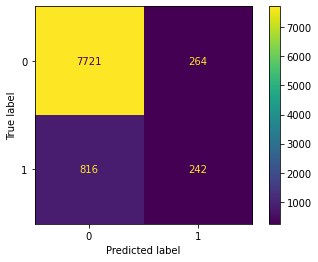

In [82]:
# Calcula a confusion_matrix para o teste
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plota a confusion matrix
ConfusionMatrixDisplay(cm_rf).plot()

### Boosting: XGBoost
Cada vez que o XGBoost acrescenta uma nova árvore no ensemble, ele a usa para corrigIr os erros residuais do último grupo de árvores. <br>
[Documentação](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn)

<img src="https://miro.medium.com/max/953/1*wpVgt07J_TeH3jEdc3A50g.png" width=700 />

In [71]:
# Vamos importar o modelo de classificação do XGBoost da biblioteca do xgboost
from xgboost import XGBClassifier

# Instancia a classe do modelo
xgb = XGBClassifier()

# Faz o treino na base de treino
xgb.fit(x_train, y_train)

[11:22:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Avaliar modelo

In [73]:
# Faz a predição do modelo treinado na base de teste
y_pred_xgb = xgb.predict(x_test)

# Verifica o modelo com o classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.63      0.47      0.54      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.72      0.74      9043
weighted avg       0.90      0.91      0.90      9043



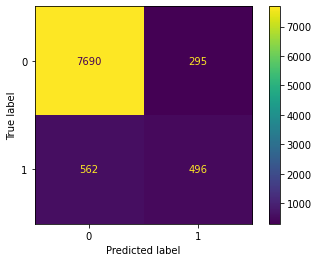

In [83]:
# Calcula a confusion_matrix para o teste
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plota a confusion matrix
ConfusionMatrixDisplay(cm_xgb).plot()

## Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

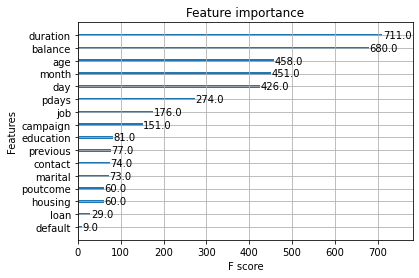

In [75]:
# Importa o método plot_importance do xgboost
from xgboost import plot_importance

plot_importance(xgb)

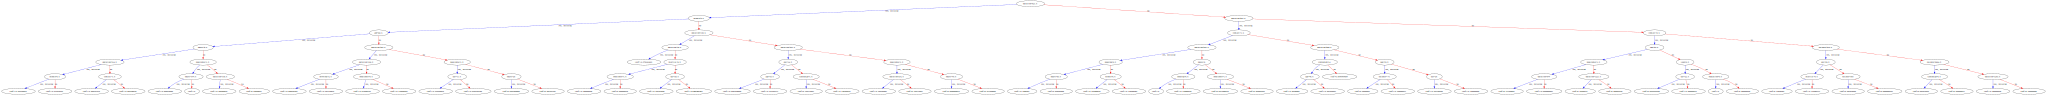

In [88]:
# Importa o método to_graphviz do xgboost
from xgboost import to_graphviz

to_graphviz(xgb)

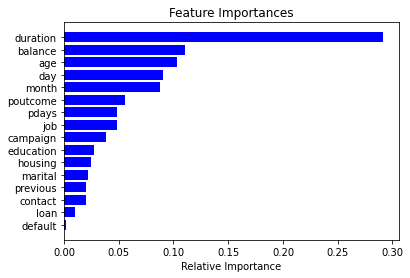

In [76]:
features = x.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Podemos criar modelos menos complexos selecionando as features mais importantes:

In [77]:
# Vamos considerar apenas as 3 features mais importantes
x_importance = x[['duration', 'balance', 'age']]

#### particionar dados
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_importance, y, stratify=y, test_size=0.2, random_state=42) 


In [78]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

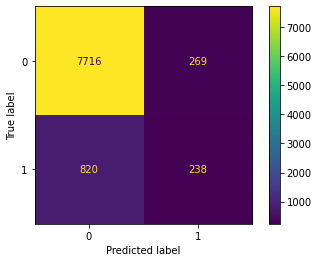

In [79]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()

In [80]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7985
           1       0.47      0.22      0.30      1058

    accuracy                           0.88      9043
   macro avg       0.69      0.60      0.62      9043
weighted avg       0.85      0.88      0.86      9043



## Vantagens e Desvantagens
__Vantagens:__
* Geralmente fornecem modelos com alta acurácia (classificação)
* Necessita de pouco tratamento dos dados (modelos de árvore são muito pouco sensíveis ao scaling, mas vc pode tentar!)
* Conseguem lidar com dados faltantes (dois métodos: média dos valores para repor variáveis contínuas e  computa proximity-weighted average)
* Fornece uma estimativa da importancia das features
* São robustos aos [outliers](https://stats.stackexchange.com/questions/187200/how-are-random-forests-not-sensitive-to-outliers) nas variáveis independentes e conseguem lidar com eles automaticamente (tendem a isolar os outliers)
* Podem ser usados na seleção de features
* Conseguem construir fronteiras de decisão não-lineares
* Os dados não precisam seguir uma distribuição normal (como em modelos lineares), mas vale testar!
* Lidam bem com uma quantidade muito grande de dados e features

__Desvantagens:__
* No RF, AdaBoost e XGBoost as variáveis categóricas não ordinais devem ser convertidas para dummie ([mean encoding](https://towardsdatascience.com/why-you-should-try-mean-encoding-17057262cd0))
* Não é recomendado utilizar nenhum modelo que depende do bagging em problemas com classes desbalanceados. Em dados extremamente desbalanceados existe uma probabilidade significativa de uma amostra ser selecionada com poucas ou nenhuma amostra da classe minoritária.
* Não é muitor recomendado na extrapolação de dados (suponha a predição de preço de casas. Se sua regressão linear foi treinada com casas até 4 quartos e no teste aparece uma de 8 você consegue extrapolar e prever de forma consistente. Com os modelos de árvore não.)
* Em geral, não lidam bem com dados muito esparsos.
* É menos interpretável que uma regressão linear ou uma árvore de decisão, por exemplo.


## Bibliografia e Aprofundamento
- [Problemas com as variáveis dummie](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769)
- [When to avoid RF](https://stats.stackexchange.com/questions/112148/when-to-avoid-random-forest)
- [Very skewed data](https://stats.stackexchange.com/questions/172842/best-practices-with-data-wrangling-before-running-random-forest-predictions)
- [Como RF lida com missing](https://www.numpyninja.com/post/all-about-random-forests-and-handling-missing-values-in-them)
- [Feature Importance x Feature Permutation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)
- [Out-of-bag error](https://en.wikipedia.org/wiki/Out-of-bag_error)
- [OOB error vs. test set error](https://uc-r.github.io/random_forests)
- [Principais dúvidas no XGBoost](https://towardsdatascience.com/20-burning-xgboost-faqs-answered-to-use-the-library-like-a-pro-f8013b8df3e4)